## Customer Behavior Analysis Report

**Assignment Overview: <br>
This report analyzes customer interactions, spending behavior, and sentiment to provide actionable insights**

Since the dataset is not provided, We are going to generate synthetic data for analysis

In [47]:
import numpy as np
import pandas as pd

In [48]:
np.random.seed(42)  # so that result matches

num_customers = 20  # Number of customers for this analysis, I have generated this randomly

customer_data = pd.DataFrame({
    "Customer_ID": np.arange(1001, 1001 + num_customers),  # Unique IDs
    "Booking_Frequency": np.random.randint(1, 10, num_customers),  # Random bookings
    "Avg_Spending": np.random.randint(50, 500, num_customers),  # Random spending
    "Preferred_Service": np.random.choice(["Massage", "Facial", "Wellness Package", "Therapy"], num_customers),
    "Review_Text": np.random.choice(
        ["Loved it!", "Too expensive", "Highly recommend", "Not satisfied", "Great service", "Would book again"],
        num_customers
    ),
    "Last_Activity": pd.date_range(start="2024-01-01", periods=num_customers, freq='D').astype(str)  # Dates from Jan 1
})


In [49]:
customer_data.head()

,Customer_ID,Booking_Frequency,Avg_Spending,Preferred_Service,Review_Text,Last_Activity
0,1001,7,210,Massage,Not satisfied,2024-01-01
1,1002,4,363,Wellness Package,Not satisfied,2024-01-02
2,1003,8,71,Massage,Not satisfied,2024-01-03
3,1004,5,302,Wellness Package,Great service,2024-01-04
4,1005,7,285,Wellness Package,Highly recommend,2024-01-05


In [50]:
# 1. since our data does not contain missing values

customer_data.isna().sum()

Customer_ID          0
Booking_Frequency    0
Avg_Spending         0
Preferred_Service    0
Review_Text          0
Last_Activity        0
dtype: int64

In [51]:
# let me add NA (missing data) explicitly

customer_data["Avg_Spending"][3:5] = np.nan

C:\Users\sachi\AppData\Local\Temp\ipykernel_17424\2577940435.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_data["Avg_Spending"][3:5] = np.nan


In [52]:
customer_data.isna().sum()

Customer_ID          0
Booking_Frequency    0
Avg_Spending         2
Preferred_Service    0
Review_Text          0
Last_Activity        0
dtype: int64

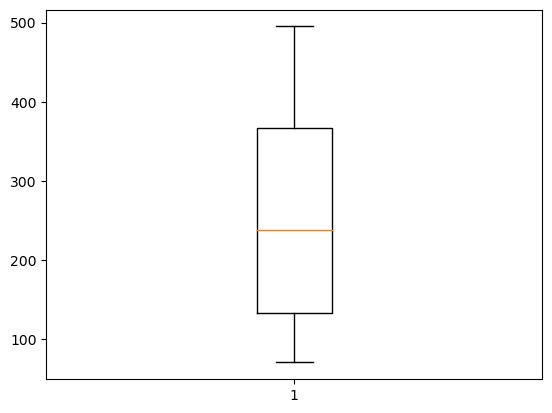

In [53]:
# Now there is two NA's
# lets handle it

#!pip install matplotlib

import matplotlib.pyplot as plt
plt.boxplot(customer_data["Avg_Spending"].dropna());


##### **Interpretation**: From the figure above, we can see that distribution of Average Spending is positively skewed, thus we will fillNA with median.As median is central tendency in positive skewed data

In [54]:
customer_data["Avg_Spending"] = customer_data["Avg_Spending"].fillna(customer_data["Avg_Spending"].median())

In [55]:
customer_data.isna().sum()

Customer_ID          0
Booking_Frequency    0
Avg_Spending         0
Preferred_Service    0
Review_Text          0
Last_Activity        0
dtype: int64

In [56]:
# now let us normalize numerical features, as they can be in different scales, and analysis on different scales can hinder the
# analysis


# Here we are using Z normalization, as this is appropriate for the numerical features

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
customer_data[["Booking_Frequency", "Avg_Spending"]] = scaler.fit_transform(customer_data[["Booking_Frequency", "Avg_Spending"]])


In [57]:
# !pip install textblob

In [58]:
# We analyze the sentiment of each review to understand customer satisfaction levels.
#TextBlob is used to calculate sentiment polarity:

# Positive score → Happy customer
# Negative score → Unhappy customer

# Neutral score → Indifferent customer

In [59]:
from textblob import TextBlob

def get_sentiment(text):
    return TextBlob(text).sentiment.polarity  # Returns a sentiment score (-1 to 1)

customer_data["Sentiment_Score"] = customer_data["Review_Text"].apply(get_sentiment)


In [60]:
#Now let us check the number of customer that have positive, negative and neutral sentimental score

print("Number of customers with positive sentiment:", (customer_data["Sentiment_Score"] > 0).sum())
print("Number of customers with negative sentiment:", (customer_data["Sentiment_Score"] < 0).sum())
print("Number of customers with neutral sentiment:", (customer_data["Sentiment_Score"] == 0).sum())


Number of customers with positive sentiment: 4
Number of customers with negative sentiment: 11
Number of customers with neutral sentiment: 5


In [61]:
## Tasks 2: Customer Segmentation: 
##Use K-Means Clustering or another algorithm to group customers based on behavior patterns.

In [62]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)  # KMeans with 3 clusters
customer_data["Segment"] = kmeans.fit_predict(customer_data[["Booking_Frequency", "Avg_Spending"]])


C:\Users\sachi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [63]:
# so we assign Segment 0, Segment 1, or Segment 2
#to each customer based on similar behavior patterns.

In [64]:
# I have made an assumptions based on business domain

In [65]:
high_value_customers = customer_data[customer_data["Avg_Spending"] > 1.0]
at_risk_customers = customer_data[customer_data["Sentiment_Score"] < 0]

In [66]:
print("High-Value Customers:")
print(high_value_customers["Customer_ID"])

print("\nAt-Risk Customers:")
print(at_risk_customers["Customer_ID"])


# SO here is all customer ID who are high valued as well as at risk customer

High-Value Customers:
5     1006
12    1013
14    1015
16    1017
Name: Customer_ID, dtype: int32

At-Risk Customers:
0     1001
1     1002
2     1003
7     1008
8     1009
9     1010
10    1011
14    1015
15    1016
18    1019
19    1020
Name: Customer_ID, dtype: int32


In [67]:

# Finally, we summarize key insights:
# Total customers analyzed
# High-value customer count
# At-risk customer count
# Number of customers per segment

In [68]:
summary_insights = {
    "Total_Customers": len(customer_data),
    "High_Value_Customers": len(high_value_customers),
    "At_Risk_Customers": len(at_risk_customers),
    "Customer_Segments": customer_data["Segment"].value_counts().to_dict()
}
print(summary_insights)

{'Total_Customers': 20, 'High_Value_Customers': 4, 'At_Risk_Customers': 11, 'Customer_Segments': {2: 10, 1: 5, 0: 5}}


## **Section 2: AI-powered Personalisation Model**

In [69]:
# Task: Train a recommendation model 
#that suggests services based on past customer behavior and preferences.

In [70]:
import numpy as np
import pandas as pd
# having copy of original dataframe

df = customer_data

In [71]:
# I am going to implement content based recommendation

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import NearestNeighbors
import joblib


In [72]:
label_encoder = LabelEncoder()
df["Service_ID"] = label_encoder.fit_transform(df["Preferred_Service"])

In [73]:
df.to_csv("refined_customer_data.csv", index = False)

In [74]:
##I am going to build a Content-Based Recommender (Using KNN for similarity between content)

In [75]:
features = df[["Booking_Frequency", "Avg_Spending", "Service_ID"]]
knn = NearestNeighbors(n_neighbors=3, metric='euclidean')
knn.fit(features)

NearestNeighbors(metric='euclidean', n_neighbors=3)

In [76]:
## Make Predictions for Customer (Recommendation)

In [77]:

def recommend(customer_id):
   # here I am goin g to find customer data
    customer_data = df[df["Customer_ID"] == customer_id][["Booking_Frequency", "Avg_Spending", "Service_ID"]]


    distances, indices = knn.kneighbors(customer_data)

    recommendations = df.iloc[indices[0]]["Preferred_Service"].values
    return recommendations


In [78]:
# Example: Get recommendations for Customer 1001
recommended_services = recommend(1001)[0]
print(f"Recommended services for Customer 1001: {recommended_services}")

Recommended services for Customer 1001: Massage


In [79]:
from sklearn.metrics import mean_squared_error, precision_recall_fscore_support
def evaluate_model():
    y_true = []
    y_pred = []
    true_services = []

    # For each customer in the dataset, generate recommendations
    for customer_id in df["Customer_ID"]:
        recommended_services = recommend(customer_id)
        true_services.append(df[df["Customer_ID"] == customer_id]["Preferred_Service"].values[0])
        y_true.append(df[df["Customer_ID"] == customer_id]["Preferred_Service"].values[0])
        print(y_true)
        print("-------")
        y_pred.append(recommended_services[0])

        print(y_pred)

    # Calculate precision, recall, and F1-score
    precision, recall, f1_score, _ = precision_recall_fscore_support(y_true, y_pred, average='micro')

    # Calculate Mean Squared Error (MSE)
    #mse = mean_squared_error(true_services, y_pred)

    # Print Evaluation Results
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-Score:", f1_score)


# Run the evaluation
evaluate_model()

['Massage']
-------
['Massage']
['Massage', 'Wellness Package']
-------
['Massage', 'Wellness Package']
['Massage', 'Wellness Package', 'Massage']
-------
['Massage', 'Wellness Package', 'Massage']
['Massage', 'Wellness Package', 'Massage', 'Wellness Package']
-------
['Massage', 'Wellness Package', 'Massage', 'Wellness Package']
['Massage', 'Wellness Package', 'Massage', 'Wellness Package', 'Wellness Package']
-------
['Massage', 'Wellness Package', 'Massage', 'Wellness Package', 'Wellness Package']
['Massage', 'Wellness Package', 'Massage', 'Wellness Package', 'Wellness Package', 'Massage']
-------
['Massage', 'Wellness Package', 'Massage', 'Wellness Package', 'Wellness Package', 'Massage']
['Massage', 'Wellness Package', 'Massage', 'Wellness Package', 'Wellness Package', 'Massage', 'Massage']
-------
['Massage', 'Wellness Package', 'Massage', 'Wellness Package', 'Wellness Package', 'Massage', 'Massage']
['Massage', 'Wellness Package', 'Massage', 'Wellness Package', 'Wellness Package

In [80]:
# saving model for later flask tasks

In [81]:
joblib.dump(knn, "recommendation_model.pkl")

['recommendation_model.pkl']

### **Section 3: AI Automation – NLP Chatbot for Customer Queries and Actions**

In [82]:
# !pip install spacy scikit-learn joblib
# !python -m spacy download en_core_web_sm

In [83]:
import spacy
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
import joblib

# I am going to create sample dataset of customer queries
data = {
    'query': [
        "Can I reschedule my booking?",
        "I'd like to cancel my appointment.",
        "How much is the massage session?",
        "Can I change the time for my appointment?",
        "I want to book a facial session.",
        "What is the price for a wellness package?",
        "Please cancel my booking.",
        "I need to reschedule my booking to next week.",
        "How do I book a massage?"
    ],
    'intent': [
        "reschedule",
        "cancel",
        "price",
        "reschedule",
        "book",
        "price",
        "cancel",
        "reschedule",
        "book"
    ]
}

# query: related questions, and intent is like the direction for query 

df = pd.DataFrame(data)

#  I am going to preprocess text data with spaCy
nlp = spacy.load("en_core_web_sm")

# removing punctuation 
def preprocess(text):
    doc = nlp(text)
    return " ".join([token.lemma_ for token in doc if not token.is_stop and not token.is_punct])

df['processed_query'] = df['query'].apply(preprocess)


X_train, X_test, y_train, y_test = train_test_split(df['processed_query'], df['intent'], test_size=0.3, random_state=42)

#  Convert text data into feature vectors using TF-IDF
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

#  Train a Naive Bayes classifier for intent classification: for each query mapping to intent
model = MultinomialNB() 
model.fit(X_train_tfidf, y_train)

#Saving the trained chatbot model
joblib.dump(model, 'chatbot_model.pkl')
joblib.dump(vectorizer, 'vectorizer.pkl')

print("Chatbot model trained and saved!")

Chatbot model trained and saved!


Simulate chatbot interaction with customer queries

In [84]:
# Loading the trained model and vectorizer
chatbot_model = joblib.load('chatbot_model.pkl')
vectorizer = joblib.load('vectorizer.pkl')

def get_intent(query):
   
    processed_query = preprocess(query)

    # Convert the query into a feature vector
    query_tfidf = vectorizer.transform([processed_query])

    # Predict the intent of the query
    intent = chatbot_model.predict(query_tfidf)
    return intent[0]

def chatbot_response(query):
    intent = get_intent(query)

    # This response can be customized based on the intent
    if intent == 'reschedule':
        return "Yes, you can reschedule your booking through the Blys app. Would you like me to assist you?"
    elif intent == 'cancel':
        return "Sure, I can help with that. I will proceed with your cancellation request."
    elif intent == 'price':
        return "The price depends on the service you're interested in. Could you please specify the service?"
    elif intent == 'book':
        return "I can help you with booking. Which service would you like to book?"
    else:
        return "Sorry, I couldn't understand your request. Could you please rephrase?"

# Example of interacting with the chatbot
print(chatbot_response("Can I reschedule my booking?"))
print(chatbot_response("How much is the massage session?"))


Yes, you can reschedule your booking through the Blys app. Would you like me to assist you?
I can help you with booking. Which service would you like to book?


In [85]:
def handle_reschedule(new_date_time):
    # Simulate rescheduling logic
    return f"Sent reschedule information to pro, you will get notified once it's confirmed. Your new booking time is {new_date_time}"

In [86]:
# Example for resecheduling the boooking
print(chatbot_response("Can I reschedule my booking?"))
print(chatbot_response("Yes"))
print("Please provide the new date that you would like to reschedule your booking at")
print(handle_reschedule("30 Mar 2025 10 am"))


Yes, you can reschedule your booking through the Blys app. Would you like me to assist you?
I can help you with booking. Which service would you like to book?
Please provide the new date that you would like to reschedule your booking at
Sent reschedule information to pro, you will get notified once it's confirmed. Your new booking time is 30 Mar 2025 10 am


### **Section 4: AI-powered API Development**

In [ ]:
# In  file named:  api.py